In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'rbf':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

98
93


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
17,1.0,1000.0000,rbf,0.583161,11399,0.582127,1.034400e-03
23,10.0,1000.0000,rbf,0.582304,11399,0.582127,1.772483e-04
26,100.0,1.0000,rbf,0.582841,11399,0.582127,7.137290e-04
32,1000.0,1.0000,rbf,0.582841,11399,0.582127,7.137290e-04
35,1000.0,1000.0000,rbf,0.585014,11399,0.582127,2.887389e-03
62,100.0,1.0000,rbf,0.572695,2645,0.572117,5.780205e-04
63,100.0,10.0000,rbf,0.572199,2645,0.572117,8.198872e-05
88,1.0,100.0000,rbf,0.548778,9069,0.548773,5.484599e-06
94,10.0,100.0000,rbf,0.548780,9069,0.548773,6.855748e-06
105,1000.0,10.0000,rbf,0.548773,9069,0.548773,3.330669e-16


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.558172
10470,0.596540
10484,0.552533
10508,0.568277
10795,0.610659
1080,0.600288
10887,0.549558
11038,0.588559
1113,0.572213


In [7]:
df_bests = df.loc[df.groupby('stock')['roc_auc_score'].idxmax()]
# I would like to have all of them

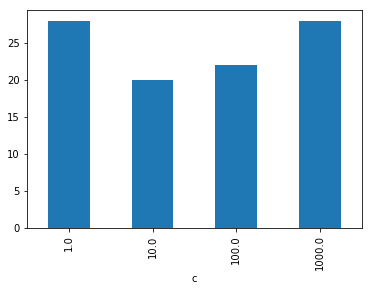

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

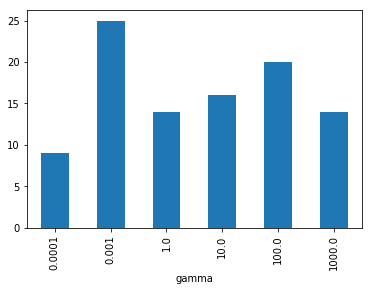

In [9]:
df_bests.groupby('gamma')['gamma'].count().plot(kind='bar')

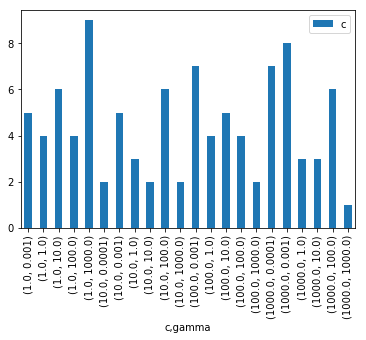

In [13]:
df_bests.groupby(['c', 'gamma'])[['c']].count().plot(kind='bar')

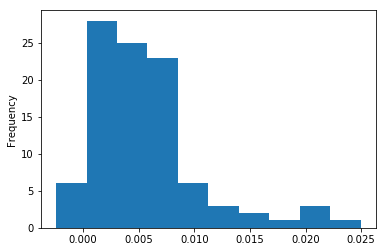

In [11]:
df_bests['diff'].plot(kind='hist')

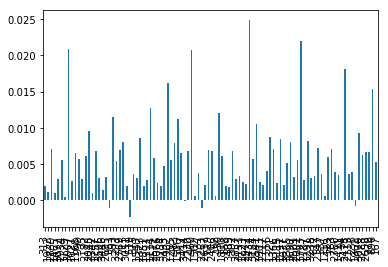

In [12]:
df_bests['diff'].plot(kind='bar')

In [14]:
df.sort_values(by='diff')

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
3396,1.0000,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3385,0.0001,0.0010,rbf,0.500000,2028,0.616323,-0.116323
3386,0.0001,1.0000,rbf,0.500000,2028,0.616323,-0.116323
3387,0.0001,10.0000,rbf,0.500000,2028,0.616323,-0.116323
3388,0.0001,100.0000,rbf,0.500000,2028,0.616323,-0.116323
3389,0.0001,1000.0000,rbf,0.500000,2028,0.616323,-0.116323
3384,0.0001,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3391,0.0010,0.0010,rbf,0.500000,2028,0.616323,-0.116323
3390,0.0010,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3394,0.0010,100.0000,rbf,0.500000,2028,0.616323,-0.116323
